In [49]:
import math
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

%matplotlib inline

In [2]:
words = open('./data/names.txt').read().splitlines()
words = list(w.lower() for w in words)
len(words)

21985

In [8]:
chars = list(set("".join(words)))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
len(itos)

30

In [11]:
X, Y = [], []
block_size = 3
for w in words:
    context =  [0] * block_size
    for c in w+'.':
        ix = stoi[c]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)
X.dtype, Y.dtype

(torch.int64, torch.int64)

In [24]:
def build_dataset(words):
    X, Y = [], []
    block_size = 3
    for w in words:
        context =  [0] * block_size
        for c in w+'.':
            ix = stoi[c]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

In [25]:
import random
random.seed(42)
random.shuffle(words)

In [26]:
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr,Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xte,Yte = build_dataset(words[n2:])

torch.Size([125752, 3]) torch.Size([125752])
torch.Size([15750, 3]) torch.Size([15750])
torch.Size([15858, 3]) torch.Size([15858])


In [28]:
C = torch.randn(len(stoi), 2)

In [29]:
emb = C[X]
emb.shape

torch.Size([157360, 3, 2])

In [30]:
emb[0]

tensor([[-1.2824,  0.5846],
        [-1.2824,  0.5846],
        [-1.2824,  0.5846]])

In [32]:
emb.view(-1, 6).shape

torch.Size([157360, 6])

In [39]:
C = torch.randn(len(itos), 10)
W1 = torch.randn(C.shape[1]*block_size, 100)
b1 = torch.randn(100)
W2 = torch.randn(100, len(itos))
b2 = torch.randn(len(itos))
parameters = [C, W1, b1, W2, b2]

In [40]:
sum(p.nelement() for p in parameters)

6430

In [41]:
for p in parameters:
    p.requires_grad = True

In [46]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10*lre
lre.shape,lrs.shape

(torch.Size([1000]), torch.Size([1000]))

In [53]:
stepsi = []
lossi = []

In [55]:
for i in range(200000):
    ixs = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ixs]]
    h = torch.tanh(emb.view(-1, block_size*10)@W1+b1)
    logits = h@W2+b2
    loss = F.cross_entropy(logits, Ytr[ixs])
    
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.1 if i<100000 else 0.01
    for p in parameters:
        p.data += -lr*p.grad
        
    stepsi.append(i)
    lossi.append(loss.log10().item())

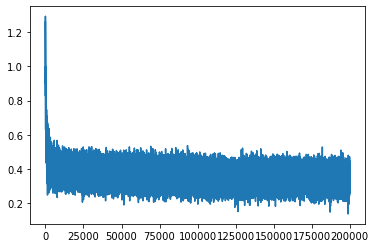

In [57]:
plt.plot(stepsi, lossi);